1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

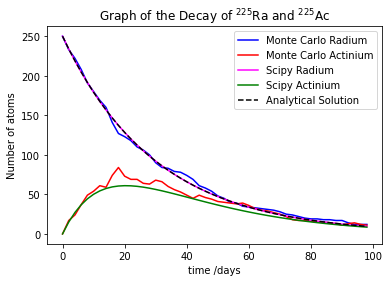

In [2]:
from __future__ import division
import numpy
import matplotlib.pyplot as pyplot
import scipy.integrate
import random


t_half_rad   = 20.8 #initial conditions
t_half_act   = 10.0
N0           = 250
t1           = 100
n_timepoints = 50

def analytic(N0, timebase):
    '''Analytic solution for the radium count'''
    return N0 * numpy.exp (-timebase /t_half_rad * numpy.log(2))
    
def simulate_monte_carlo(N0, t1, n_timepoints):
    '''Monte carlo simulation for both radium and actinium counts'''
    dt             = t1 / n_timepoints #Calculating the interval between each time division
    count_radium   = numpy.zeros((n_timepoints)) #creating zero arrays to put the counts into
    count_actinium = numpy.zeros((n_timepoints))
    atoms          = numpy.ones((N0)) #Creating an array of numbers to represent the atoms in the simulation
    p_decay_rad    = 1 - numpy.exp(-dt / t_half_rad * numpy.log(2)) #Calculating the decay probabilities in the time interval
    p_decay_act    = 1 - numpy.exp(-dt / t_half_act * numpy.log(2))
    for idx_time in range(n_timepoints):
        
        count_radium[idx_time]   = (atoms == 1).sum() #Counting how many atoms of each type remain in the interval
        count_actinium[idx_time] = (atoms == 2).sum()
        
        for idx_atom in range(N0):
            
            if atoms[idx_atom] == 1: #Deciding whether the given atom should decay
                if random.random() <= p_decay_rad:
                    atoms[idx_atom] = 2
                else:
                    atoms[idx_atom] = 1
            elif atoms[idx_atom] == 2:
                if random.random() <= p_decay_act:
                    atoms[idx_atom] = 3
                else:
                    atoms[idx_atom] = 2
                
    return count_radium, count_actinium

timebase = numpy.arange(0, t1, t1/n_timepoints) #creating the array of times for use in the analytic solution and scipy
n_analytic = analytic(N0,  timebase) #Calling the analytic solution
n_rad, n_act = simulate_monte_carlo(N0, t1, n_timepoints) #Calling the Monte Carlo Simulation   

def f(N, t):
    '''Differential for the decay, for use with scipy.integrate.odeint'''
    N_rad, N_act = N #unpacking N
    tau_rad = t_half_rad / numpy.log(2)
    tau_act = t_half_act / numpy.log(2)
    DEQ_rad = - N_rad / tau_rad
    DEQ_act = - N_act / tau_act + N_rad / tau_rad
    
    return numpy.array((DEQ_rad, DEQ_act)) #repacking

N0_rad = 250 #Initial conditions for scipy
N0_act = 0
N0 = numpy.array((N0_rad, N0_act))
n_scipy = scipy.integrate.odeint(f, N0, timebase) #Calling scipy odeint

pyplot.figure() #Plotting code
pyplot.plot(timebase, n_rad, label = 'Monte Carlo Radium', color = 'blue')
pyplot.plot(timebase, n_act, label = 'Monte Carlo Actinium', color = 'red')
pyplot.plot(timebase, n_scipy[:,0], label = 'Scipy Radium', color = 'magenta')
pyplot.plot(timebase, n_scipy[:,1], label = 'Scipy Actinium', color = 'green')
pyplot.plot(timebase, n_analytic, label = 'Analytical Solution', color = 'black', linestyle = '--')
pyplot.title('Graph of the Decay of $^{225}$Ra and $^{225}$Ac')
pyplot.ylabel('Number of atoms')
pyplot.xlabel('time /days')
pyplot.legend(loc='upper right') 
pyplot.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

Text(0.5, 1.0, 'Monte Carlo')

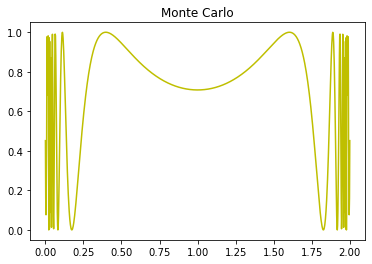

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def f(x):
    return (np.sin(1/(x*(2-x))))**2

x=np.linspace(0.001,1.999,1000)
plt.plot(x,f(x),'y-')
plt.title('Monte Carlo')


In [6]:
N=100000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=2*count/N
print(I)

1.44996


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [20]:

def func(x,y):
    if (x**2)+(y**2)<=1 :
        return 1
    else :
         return 0

func(2,2)

  
def mc_integrate(func, a, b, n = 1000):
     
    vals = np.random.uniform(a, b, n)
    y = [func(val) for val in vals]
    
    y_mean = np.sum(y)/n
    integ = (b-a) * y_mean
    
    return integ

print(f"Monte Carlo solution: {mc_integrate(func, -2, 2, 500000): .4f}")
# print(f"Analytical solution: {func1_int(-2, 2): .4f}")

TypeError: func() missing 1 required positional argument: 'y'

5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84